# generate hist


In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = []
with open(r"C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231001_1107\ASVspoof2021_DF_eval_part00_durations.txt", "r") as f:
  for line in f:
    id, duration = line.strip().split()
    data.append([id, float(duration)])

In [3]:
durations = []
for row in data:
  durations.append(row[1])

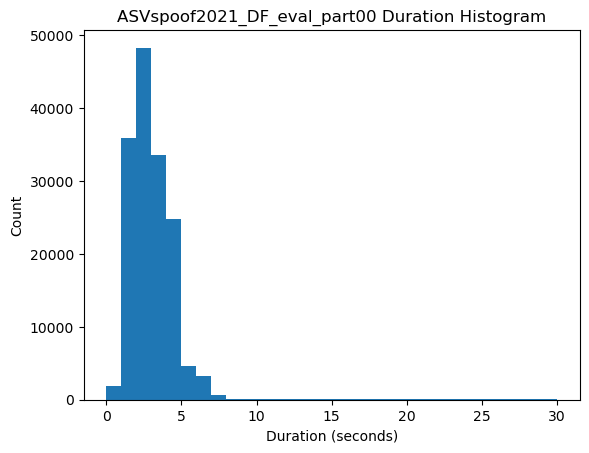

In [4]:
plt.hist(durations, bins=[0, 1, 2, 3, 4, 5 ,6, 7, 8, 30])
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("ASVspoof2021_DF_eval_part00 Duration Histogram")
plt.show()

In [23]:
(min(durations), max(durations))


(0.35475, 29.225)

In [61]:
counts, bin_edges = np.histogram(durations, bins=[0, 1, 2, 3, 4, 5 ,6, 7, 8, 10, 15, 20, 25, 30])

In [62]:
for b,c in zip(bin_edges, counts):
    print(f"{b:5} {c:3<}")

    0 1833
    1 35824
    2 48264
    3 33558
    4 24725
    5 4619
    6 3318
    7 686
    8 106
   10 10
   15 0
   20 10
   25 2


# ASVspoof2021_DF_eval_part01_durations.txt

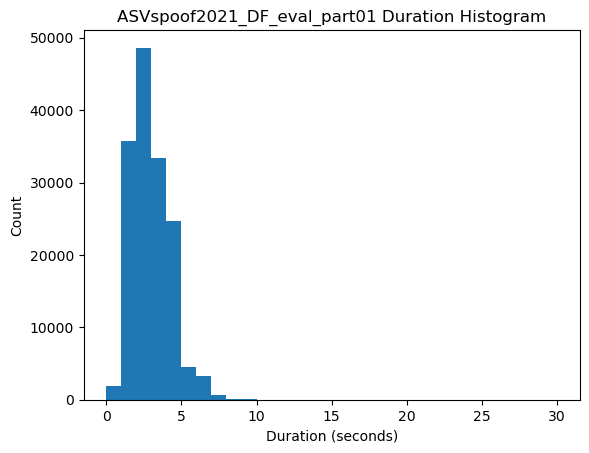

In [63]:
ASVspoof2021_DF_eval_part01 = []
with open("ASVspoof2021_DF_eval_part01_durations.txt", "r") as f:
  for line in f:
    id, duration = line.strip().split()
    ASVspoof2021_DF_eval_part01.append(float(duration))
plt.hist(ASVspoof2021_DF_eval_part01, bins=[0, 1, 2, 3, 4, 5 ,6, 7, 8, 10, 15, 20, 25, 30])
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("ASVspoof2021_DF_eval_part01 Duration Histogram")
plt.show()

# in the wild

In [37]:
inthewildduration = []
with open("release_in_the_wild_durations.txt", "r") as f:
  for line in f:
    id, duration = line.strip().split()
    inthewildduration.append(float(duration))

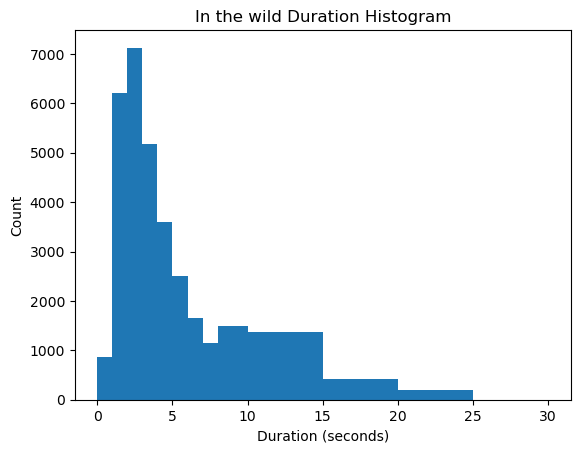

In [58]:
plt.hist(inthewildduration, bins=[0, 1, 2, 3, 4, 5 ,6, 7, 8, 10, 15, 20, 25, 30])
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("In the wild Duration Histogram")
plt.show()

In [39]:
counts, bin_edges = np.histogram(inthewildduration, bins=[0, 2, 3, 4, 5 ,6, 7, 8, 10, 15, 20, 25, 30])
for b,c in zip(bin_edges, counts):
    print(f"{b:5} {c:3<}")

    0 7084
    2 7127
    3 5174
    4 3607
    5 2508
    6 1648
    7 1150
    8 1492
   10 1374
   15 418
   20 197
   25 0


# 6-8 duration

In [8]:
inputfile=r"C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231001_1107\ASVspoof2021_DF_eval_part00_durations.txt"
Pr=0.1
MinV=6
MaxV=8

outfile=f"20231008_ASVspoof2021_DF_eval_part00_durations_{MinV}_{MaxV}.txt"

# Select 1% of lines that the second column value is between 10 and 100 from the text file "text_file.txt".
#Pr=0.02
selected_lines = select_lines(inputfile, MinV, MaxV, Pr)
print(f"{outfile} {Pr=} {len(selected_lines)}")

# Write the selected lines to a new text file called "selected_lines.txt".
with open(outfile, "w") as f:
  for line in selected_lines:
    id, duration = line.strip().split()
    f.write(f"{id}.flac\n")

20231008_ASVspoof2021_DF_eval_part00_durations_6_8.txt Pr=0.1 400


# select random files based on duration

[work dir](C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231001_1107)

In [6]:
import random

def select_lines(filename, MinV, MaxV, pr):
  with open(filename, "r") as f:
    lines = f.readlines()

  selected_lines = []
  for line in lines:
    columns = line.strip().split()
    second_column_value = float(columns[1])

    if MinV <= second_column_value < MaxV:
      selected_lines.append(line)

  random.shuffle(selected_lines)
  return selected_lines[:int(len(selected_lines) * pr)]


In [9]:

inputfile=r"C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231001_1107\ASVspoof2021_DF_eval_part00_durations.txt"

bins=[0, 1, 2, 3, 4, 5 ,6, 8, 50]
precentage=[0.3, 0.02, 0.015, 0.02, 0.02, 0.10, 0.1, 1.0, 0.0]
for i, Pr in zip(range(len(bins)-1), precentage):
    MinV=bins[i]
    MaxV=bins[i+1]

    Pr *= 3
    Pr = min(Pr, 1.0)

    
    # Select 1% of lines that the second column value is between 10 and 100 from the text file "text_file.txt".
    #Pr=0.02
    selected_lines = select_lines(inputfile, MinV, MaxV, Pr)
    print(f"{outfile} {Pr=} {len(selected_lines)}")
    
    # Write the selected lines to a new text file called "selected_lines.txt".
    outfile=f"20231008_ASVspoof2021_DF_eval_part00_durations_l{len(selected_lines)}_{MinV}_{MaxV}.txt"
    with open(outfile, "w") as f:
      for line in selected_lines:
        id, duration = line.strip().split()
        f.write(f"{id}.flac\n")

20231008_ASVspoof2021_DF_eval_part00_durations_6_8.txt Pr=0.8999999999999999 1649
20231008_ASVspoof2021_DF_eval_part00_durations_l1649_0_1.txt Pr=0.06 2149
20231008_ASVspoof2021_DF_eval_part00_durations_l2149_1_2.txt Pr=0.045 2171
20231008_ASVspoof2021_DF_eval_part00_durations_l2171_2_3.txt Pr=0.06 2013
20231008_ASVspoof2021_DF_eval_part00_durations_l2013_3_4.txt Pr=0.06 1483
20231008_ASVspoof2021_DF_eval_part00_durations_l1483_4_5.txt Pr=0.30000000000000004 1385
20231008_ASVspoof2021_DF_eval_part00_durations_l1385_5_6.txt Pr=0.30000000000000004 1201
20231008_ASVspoof2021_DF_eval_part00_durations_l1201_6_8.txt Pr=1.0 128


# get all files duration

In [67]:
import pandas as pd


def g(file1, file2):
    df1 = pd.read_csv(file1, header=None, names=['ID', 'duration'], delim_whitespace=True)
    print(df1.head())
    df2 = pd.read_csv(file2, header=None, names=['ID'])
    print(df2.head())
    df = df1.set_index('ID').join(df2.set_index('ID'), how='inner')['duration'].sum()
    return df


file1 = r"C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231001_1107\ASVspoof2021_DF_eval_part00_durations.txt"
file2 = r"C:\work\Github\Tensor_Lihu\MultiKol\SSL_Anti-spoofing\results\20231002_1042\ASVspoof2021.DF.cm.eval.trl.txt"

result = g(file1, file2)
print(result)

             ID  duration
0  DF_E_2000011  1.425063
1  DF_E_2000013  3.200000
2  DF_E_2000024  1.856000
3  DF_E_2000026  2.944000
4  DF_E_2000027  1.856000
             ID
0  DF_E_2000143
1  DF_E_2001772
2  DF_E_2003652
3  DF_E_2004186
4  DF_E_2006206
1999.532078


In [68]:
print(18*60/2000)


0.54
